<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Aprendizaje supervisado: Clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario*

**Objetivo:** Imaginando que estamos a medioados de 2020, predecir en qué horas el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores a 40 €, y **clase 1** para valores mayores a 40 €.  Se utilizará el contexto y datos históricos del **2020** de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


### Antes de empezar:

* En el archivo **S4-data-precios.xlsx** se encuentra el conjunto de datos de entrada de este ejemplo (atributos + etiqueta). 
* Datos del 2 de enero 2020 al 26 de junio de 2020.


## **1. Importar librerías y datos**


In [1]:
# Importamos las librerías
import sklearn                                     # Machine Learning Library
import pandas as pd                                # Data analysis and manipulation library
import matplotlib.pyplot as plt                    # Plot library
import numpy as np                                 # For n-dimentional arrays
import warnings
warnings.filterwarnings('ignore')

# Cargamos el conjunto de datos de entrada
dataset = pd.read_excel('Data/S4-data-precios.xlsx')

## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

**1. ¿Cuántos datos hay?**  
Tenemos 4223 filas y 14 columnas

**¿Cuántos atributos hay en los datos?** 
Hay 13 posibles "features" y 1 columna que será el "target" o "etiqueta" (lo que queremos predecir). 

In [2]:
# Filasxcolumnas de los datos
dataset.shape

(4223, 14)

In [3]:
# Observa las primeras 5 filas de los datos
dataset.head()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros


**2. ¿Qué significan?** 
* ***[Hora, Día, Mes]*** Hora, día y mes de cada una de las observaciones. Son valores enteros *int64*.

* ***[Hidraul, Eolica, Ciclocomb, Cogener, Nuclear, Carbon, Biomas]*** se refiere a la energía programada MW/hora del programa PVP en el mercado diario por tipo de producción del día anterior.  Son valores reales *float*.

* ***[Demanda]*** es la totalidad de energía programada en el mercado diario eléctrico en España el día anterior.  Son valores reales *float*.

* ***[precio-elect-dia-anterior]*** precio de la electricidad el día anterior. Son valores reales *float*.

* ***[MIBGAS-dia-anterior]*** precio del gas natural el día anterior. Son valores reales *float*.

* ***[Precio]*** son las etiquetas de precio que queremos predecir. Son valores *string*. Tendremos que transformarlas en número. 




**[INFO]** El .dtypes nos ayuda a identificar qué columnas habrá que transformar ya que son de tipo string. También detecta las columnas de tipo datetime (fecha y hora). Como habíamos comentado en el punto anterior, la columna "precio" es de tipo object (es decir, string). 

In [4]:
# Formato de los datos .info()
dataset.dtypes

hora                           int64
dia                            int64
mes                            int64
hidraul                      float64
eolica                       float64
demanda                      float64
ciclocomb                    float64
cogener                      float64
nuclear                      float64
carbon                       float64
biomas                         int64
precio-elect-dia-anterior    float64
MIBGAS-dia-anterior          float64
precio                        object
dtype: object

**3. ¿Falta algún dato? De ser así, indica cuántos y en que atributo** 

Faltan datos en las columnas *demanda* y *carbón*. Por lo tanto, deberemos de imputarle un valor a estas celdas o eliminar toda la fila (incluyendo el resto de columnas). 



In [5]:
# Comprobar si falta algún dato y en qué atributo
dataset.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
precio                       0
dtype: int64

In [6]:
dataset.drop([0, 1], axis=0).head(2) #Eliminar columnas de dataframe axis = 0 para filas y axis = 1 para columnas.

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros


In [7]:
dataset.dropna(axis=0).head(2) #Elimina de forma automatica las filas o columnas con na values. 

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros


**4. ¿Están balanceadas las etiquetas?** 

Las etiquetas no están balanceadas. Si los resultados de train y test no fueran satisfactorios, se podría utilizar alguna de las tácticas para balancear las clases (over-sampling, under-sampling). En este caso, la mejor opción sería oversampling de la clase minoritaria, ya que no hay muchas muestras disponibles. 

menor que  40 euros    3507
mayor que  40 euros     716
Name: precio, dtype: int64


<AxesSubplot:ylabel='precio'>

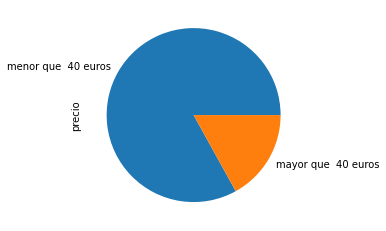

In [8]:
# Comprobar si las etiquetas están desvalanceadas
balance_clases = dataset['precio'].value_counts()
print(balance_clases)

# Gráfico del balance de clases
balance_clases.plot.pie()

**5. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [9]:
# Datos estadísticos de cada uno de los atributos
dataset.describe()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
count,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000
mean,11.502250,15.411556,3.443287,3090.683495,6142.901373,20223.538578,2337.097135,3059.788942,6019.210466,674.060308,374.144684,28.813694,8.288518
std,6.922282,8.598094,1.674775,1398.795645,3488.275912,3945.242127,1488.503359,282.994453,1212.068728,444.206117,102.061931,10.929161,2.347374
min,0.000000,1.000000,1.000000,856.600000,614.400000,0.000000,460.000000,1825.500000,3410.200000,0.000000,197.000000,1.020000,4.170000
25%,6.000000,8.000000,2.000000,1924.150000,3447.650000,17123.000000,1255.600000,2909.150000,4886.200000,413.000000,287.000000,21.080000,6.040000
50%,12.000000,15.000000,3.000000,2760.400000,5394.900000,20094.500000,1962.600000,3089.300000,6730.500000,530.000000,373.000000,28.410000,8.180000
75%,17.500000,23.000000,5.000000,4126.450000,8229.350000,22871.725000,2893.350000,3238.150000,7089.500000,973.000000,462.000000,36.670000,9.975000
max,23.000000,31.000000,6.000000,7411.900000,18996.300000,35458.900000,9078.400000,3696.800000,7100.500000,2065.000000,551.000000,62.480000,14.480000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.
Aquí observamos que la generación eólica sigue la distribución de Weibull. Tambíen se aprecia en la generación nuclear cuando se prduce la parada de alguna central nuclear debido a mantenimiento o cambio de combustible. Sin embargo, no aparece el histograma de la etiqueta (precio), ya que se trata de un string, no número. 

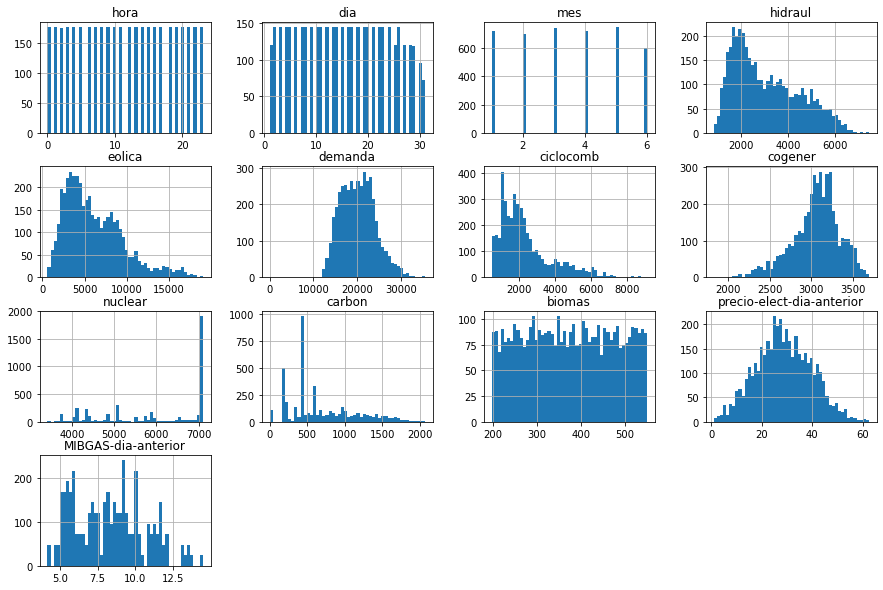

In [10]:
histograma = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo picos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

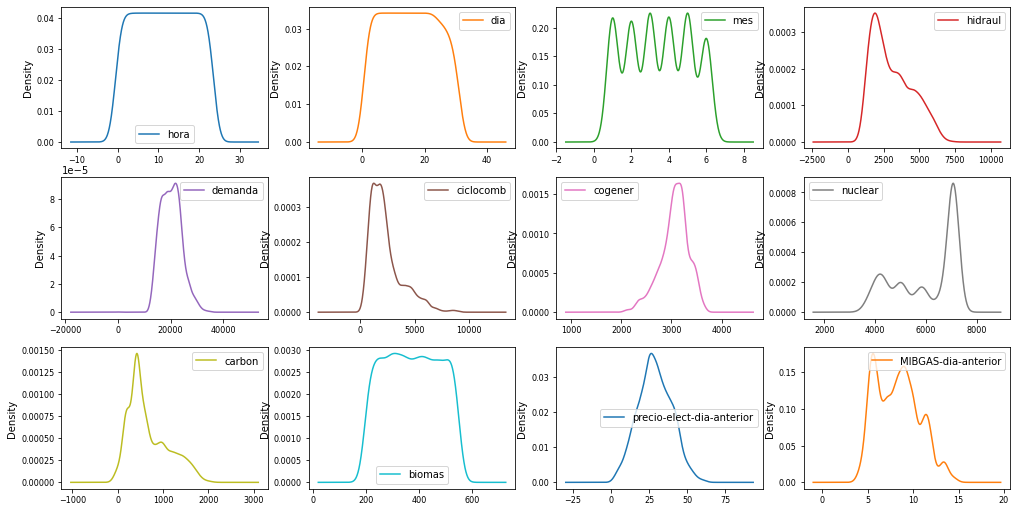

In [11]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Que atributo llama la atención por sus valores atípicos?**. 
La eólica y el ciclo combinado. Podría pensarse que estos outliers deberían de ser eliminados, pero es todo lo contrario: para días con una generación eólica inusualmente alta, esto será un indicativo muy importante a la hora de predecir el precio, ya que probablemente sea bajo. Sucede al contrario en la generación de ciclo combinado: un valor inusualmente alto de generación de ciclo combinado, indicará probablemente unos altos precios. 

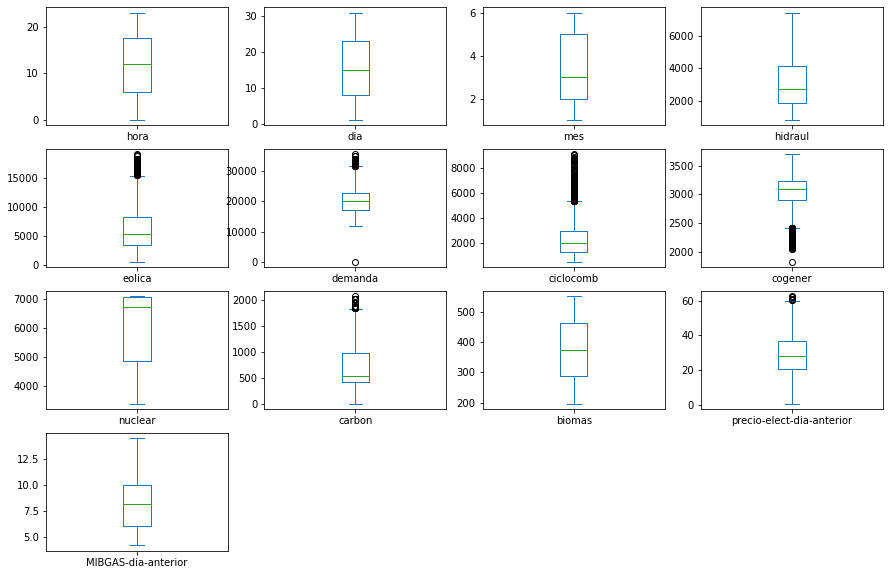

In [12]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

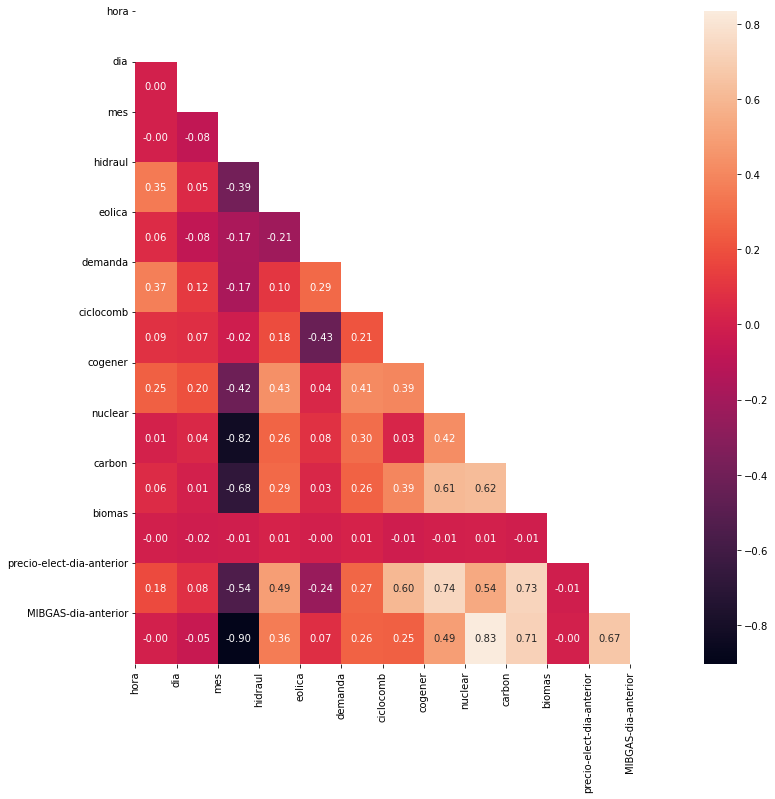

In [13]:
# Otra librería de visualización de datos
import seaborn as sns

# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 


# Quitar valores repetidos
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

No podemos ver la correlación con el precio, debemos pasarlo a numérico [LabelEncoder] 

[LabelEncoder]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

<div class="alert alert-success">

### Label Encoder vs One Hot Encoder
Cuando trabajamos con Python y Sklearn, necesitamos que todos los datos que vamos a modelizar sean númericos. Si tenemos variables de tipo string necesitamos previamente transformarlas a números. La forma más rápida para realizar esta tarea es emplear preprocesing de sklearn *LabelEncoder* o *OnehotEncoding*. 
Hay que tener cuidado con el orden de las codificaciones porque es un orden léxico-gráfico, no va por orden de aparición.
    
Leer más sobre esto: [TowardsDataScience]
    
[TowardsDataScience]: https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
</div> 

<img src="Figures/label-hot.jfif" alt="Drawing" width="700"/>

In [14]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(dataset['precio'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

dataset['precio'] = lab_encoder.transform(dataset['precio'])
print(dataset)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

     

In [15]:
# replace column values 0: menor que 40; 1: mayor que 40. 

dataset['precio'] = dataset['precio'].map({0:1, 1:0})


In [16]:
dataset

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,0
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,0
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,0
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,0
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28,0
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,1
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28,0
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28,1


## *4. Preparar los datos*

1. Missing data
2. Data cleaning (eliminar outliers).
3. LabelEncoding (ya lo hemos hecho)
4. Feature engineering
5. Transformación.

Primero, divido los datos en:

* **Features/características/atributos/variables de entrada**: **X**
* **Target/etiquetas**: y 

<img src="Figures/X_y.png" alt="Drawing" style="width: 700px;"/>

In [17]:
# Atributos X (features); etiquetas y (target)
X = dataset.drop(['precio'], axis=1) 
y = dataset[['precio']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hora                       4223 non-null   int64  
 1   dia                        4223 non-null   int64  
 2   mes                        4223 non-null   int64  
 3   hidraul                    4223 non-null   float64
 4   eolica                     4223 non-null   float64
 5   demanda                    4220 non-null   float64
 6   ciclocomb                  4223 non-null   float64
 7   cogener                    4223 non-null   float64
 8   nuclear                    4223 non-null   float64
 9   carbon                     4220 non-null   float64
 10  biomas                     4223 non-null   int64  
 11  precio-elect-dia-anterior  4223 non-null   float64
 12  MIBGAS-dia-anterior        4223 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 429.0 KB


In [18]:
# Imprimo el target "precio"
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   precio  4223 non-null   int64
dtypes: int64(1)
memory usage: 33.1 KB


**Missing data**

Comprobar si exisiten Nan en los datos de entrada. 

- Se utiliza el método [fillna] de Pandas.

- Más información acerca de cómo imputar valores con [Scikit Learn]

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html





In [19]:
# Comprobar si faltan datos en los atributos
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

In [20]:
# Relleno los missing values de cada atributo con el valor anterior del atributo. 
X["demanda"].fillna(method='ffill', inplace=True)
X["carbon"].interpolate(method='linear', inplace=True)

In [21]:
# Comprobar si faltan datos en el target
y.isna().sum()

precio    0
dtype: int64

In [22]:
# Comprueba que no falta ningún valor
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      0
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       0
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

**3. Feature engineering**

Utilizando la matriz de correlación, eliminar los atributos con una correlacion cercana a 0 con la etiqueta **"precio"**. 

* **¿Qué atributo(s) se elimana(n)?** 

In [23]:
# Elimino el atributo
X.drop(['biomas', 'dia', 'eolica', 'mes'], axis='columns', inplace=True)

## *5. Dividir los datos*


<img src="Figures/train-val-test.png" alt="Drawing" style="width: 20px;"/>
 


<div class="alert alert-success">

### ¿En qué proporción dividir el conjunto de datos?

A menudo se pregunta en qué proporción hay que dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba.

Esta decisión depende principalmente de dos cosas: i) el número total de muestras de sus datos, ii) del modelo que esté entrenando.

* Algunos modelos necesitan un número considerable de datos para entrenarse, por lo que en este caso se optimizarían los conjuntos de entrenamiento más amplios.
* Los modelos con muy pocos hiperparámetros serán fáciles de validar y ajustar, por lo que probablemente pueda reducir el tamaño de su conjunto de validación.
* Pero si su modelo tiene muchos hiperparámetros, querrá tener también un conjunto de validación significativo.
    
Como orientación, 65% train, 15% validación, 20% test.
    
</div> 


In [24]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, shuffle=False)

**4. Transformación (escalado)**. 

* **Escalar los datos utilizando el método de *MinMaxScaler()* dentro del rango [0,1].**

<div class="alert alert-success">
    
Hemos hablado previamente de que varios algoritmos de aprendizaje automático son sensibles cuando los datos no están escalados. Hay varios algoritmos de aprendizaje automático que se basan totalmente en el mapeo de la distancia entre los puntos de datos. COmo por ejemplo:
    
* SVM
* KNN
* K-means (unsupervised)
* Principal Component Analysis (PCA) (Unsupervised)
* Redes Neuronales (MLP)

RandonForest, CART, Gradient Boosted Decision Trees no necesitan de escalado. 

Las técnicas más comunes de escalado de características son la **normalización** y la **estandarización**.

* La normalización se utiliza cuando queremos acotar nuestros valores entre dos números, normalmente, entre [0,1] o [-1,1].
* La estandarización transforma los datos para que tengan una media cero y una varianza de 1. 

    
Más [información]
    
[información]: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
    
<img src="Figures/scaling.png" alt="Drawing" width="700"/>
    
</div> 

<div class="alert alert-success">

### Importante!!

* Divide los datos (train, validation, test)
* Escala los datos de entreno
* Escala los datos de test/validación con los parámetros de entreno. 

</div> 

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = X_train.copy()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train))  # FIT() + TRANSFORM()
X_train_sc.columns = X_train.columns
X_train_sc.head()

,hora,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0.000000,0.665797,0.031960,0.236761,0.357131,0.996590,0.208232,0.659673,0.574271
1,0.043478,0.621162,0.007052,0.226434,0.332550,0.995602,0.208232,0.605485,0.574271
2,0.086957,0.610758,0.000000,0.214367,0.331908,0.996096,0.201937,0.571617,0.574271
3,0.130435,0.629140,0.012179,0.214367,0.326618,0.996096,0.187409,0.501735,0.574271
4,0.173913,0.629674,0.023681,0.222106,0.332817,0.997084,0.187409,0.477449,0.574271


## *6. Construcción y evaluación de modelos*

* Seleccionamos **[balanced_accuracy]** como métrica de evaluación. 
* Métricas de evaluación disponibles en [Scikit-Learn].


[Scikit-Learn]: https://scikit-learn.org/stable/modules/model_evaluation.html

[balanced_accuracy]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* Recordar utilizar siempre el mismo random_state para poder comparar resultados. 

In [26]:
!pip install xgboost


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb  

num_folds = 5
error_metrics = {'balanced_accuracy'}
models = { ('LR', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
           ('RF', RandomForestClassifier())
         }

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


* **¿Cuál obtiene mejores resultados?** 
* **¿Qué balanced_accuracy obtiene?** El Random Forest obtiene mejores resultados, con un balance accuracy superior a 0.85

Métrica de evaluación:  balanced_accuracy
Modelo  LR
Modelo  RF
Modelo  KNN
[('LR', 0.8361014216207675, 0.13336039470456285), ('RF', 0.8113700778873527, 0.15226202284310075), ('KNN', 0.7852913773917098, 0.12873043713577842)]


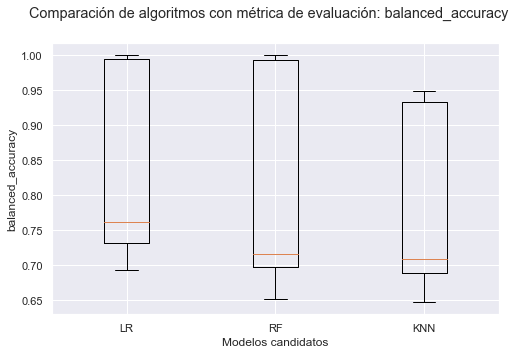

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    sns.set(rc={'figure.figsize':(8,5)})
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:
[RandomForest] parámeteros

* Métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Entrenar con los datos de validación: *X_val*
* Escalar los valores de validación (aunque en RF no sería necesario)

[RandomForest]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [29]:

from sklearn.model_selection import TimeSeriesSplit

X_val_sc = scaler.transform(X_val)  # Aquí aplico solo el .transform(), no el .fit() -- para usar los parámetros de train. 

# RF
modelo = RandomForestClassifier()
hyperparams = {
     'n_estimators': [100, 500, 800], #default=100
     'min_samples_split': [2, 4], #default=2
     'bootstrap': [True, False],  #default=True
 }

scoring='balanced_accuracy'
cross_validation = TimeSeriesSplit(n_splits=10)
my_cv = cross_validation.split(X_val_sc, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=hyperparams, scoring=scoring, cv=my_cv, verbose=2) 
gsearch.fit(X_val_sc, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True,

[CV] END bootstrap=False, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=

## *8. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)

    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [30]:
# modelo_final = RandomForestClassifier(max_features='sqrt', min_samples_split=5,  n_estimators=400, class_weight={0:1,1:5})
modelo_final =RandomForestClassifier(bootstrap=False, min_samples_split=2, n_estimators= 800)
modelo_final.fit(X_train_sc,y_train)  # Se entrena al modelo RF con los hiperparámetros seleccionados.

# Escalo el test data
X_test_sc = scaler.transform(X_test)

# Realizo las predicciones
y_predict = modelo_final.predict(X_test_sc)  # Se calculan las predicciones


In [31]:
# Instalamos la librería shap para realizar un gráfico
!pip install shap

## Métricas de Evaluación

**1. Matriz de confusión**

La matriz de confusión es una herramienta muy útil para valorar cómo de bueno es un modelo clasificación basado en aprendizaje automático. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error. 

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       838
           1       0.33      0.29      0.31         7

    accuracy                           0.99       845
   macro avg       0.66      0.64      0.65       845
weighted avg       0.99      0.99      0.99       845

[[834   4]
 [  5   2]]


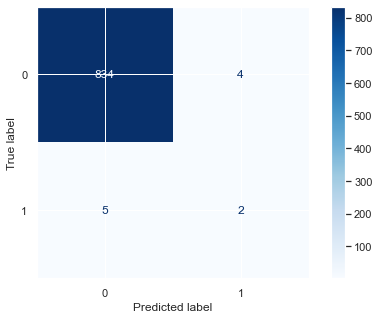

In [33]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_test_sc, y_test,
                                 cmap=plt.cm.Blues, values_format = '')
sns.set(rc={'figure.figsize':(5,5)})

**3. Curva ROC / AUC**.

* Curva ROC: Curva de la tasa de verdaderos positivos frente a la tasa de falsos positivos con diferentes umbrales de clasificación.

* AUC: (Área bajo la curva): El área bajo la curva (AUC) ROC es la probabilidad de que un clasificador tenga más confianza en que un ejemplo positivo elegido al azar sea realmente positivo en relación con que un ejemplo negativo elegido al azar sea positivo.

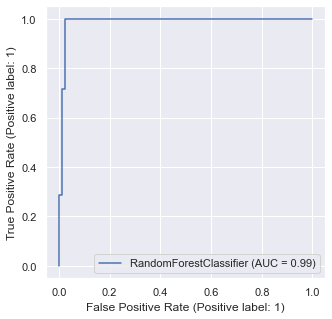

In [34]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

plot_roc_curve(modelo_final, X_test_sc, y_test)
auc = roc_auc_score(y_test, y_predict)